In [1]:
import numpy as np
import matplotlib.pyplot as plt

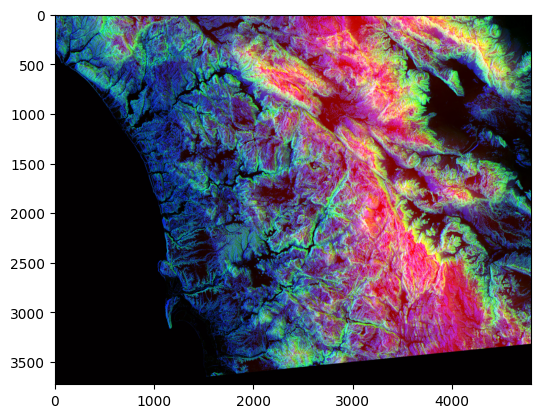

In [2]:
img = plt.imread('sd-3layers.jpg')
plt.imshow(img)

Estrazione e Mappa di una Variabile
Obiettivo: Creare una mappa in scala di grigi che visualizzi solo la Pendenza del terreno.

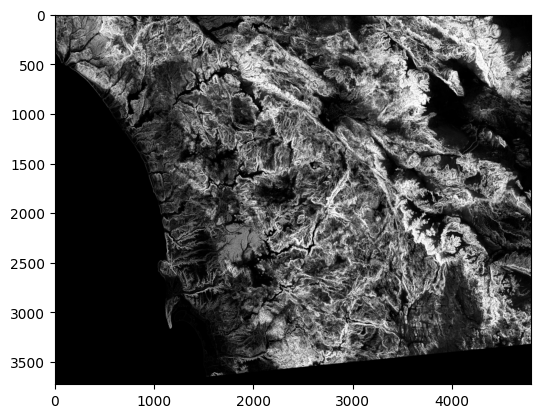

In [3]:
pendenza_map = img[:, :, 1] 

plt.imshow(pendenza_map, cmap='gray')

Segmentazione Spaziale
Obiettivo: Isolare tutti i corpi idrici (Bassa Pendenza e Alto Valore Blu) situati ad Altitudine Media (Rosso tra 50 e 150).

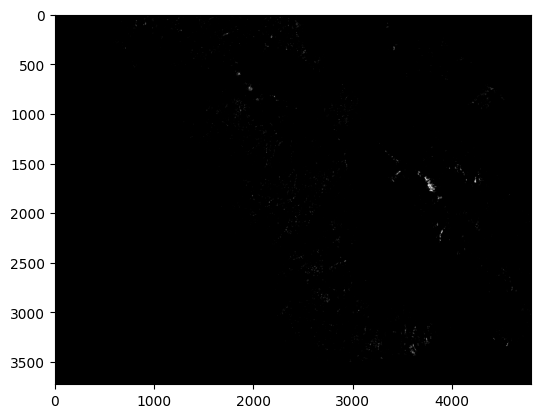

In [4]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

mask_alt_media = (R > 50) & (R < 150)

mask_bassa_pendenza = G < 30

mask_alta_acqua = B > 180

bacino_idrico_mask = mask_alt_media & mask_bassa_pendenza & mask_alta_acqua

plt.imshow(bacino_idrico_mask, cmap="gray")

Creazione di un Indice Composto
Obiettivo: Calcolare l'Indice di Instabilità del Terreno, che è fortemente influenzato dalla Pendenza e dall'Acqua.

    Altitudine (R): Peso basso (0.2)

    Pendenza (G): Peso molto alto (0.7)

    Acqua/Piane (B): Peso moderato (0.1)

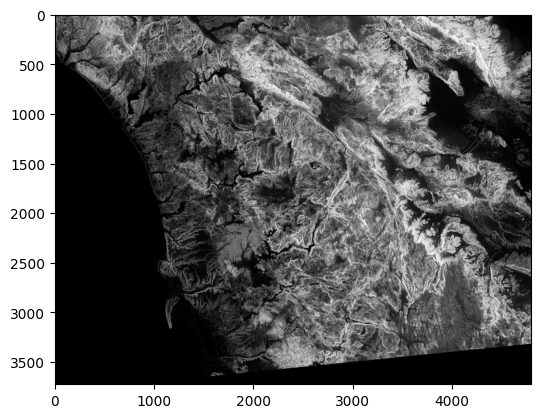

In [5]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

pesi_rischio = np.array([0.2, 0.7, 0.1])

indice_rischio_geologico = np.dot(img, pesi_rischio)

indice_rischio_geologico = np.clip(indice_rischio_geologico, 0, 255)
plt.imshow(indice_rischio_geologico, cmap="gray")